In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('data/alturas-pesos-mils-train.csv')

FileNotFoundError: [Errno 2] File data/alturas-pesos-mils-train.csv does not exist: 'data/alturas-pesos-mils-train.csv'

In [ ]:
# Busco que el modelo me tire probabilidades y no certezas.

In [ ]:
df

In [60]:
le = LabelEncoder()
le.fit(df['Genero'])
df['Genero_enc'] = le.transform(df['Genero'])

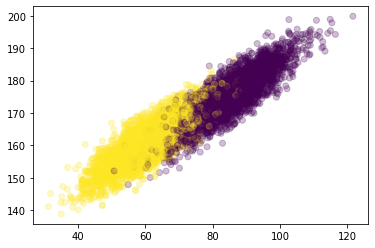

In [20]:
plt.scatter(df['Peso'], df['Altura'], c=df['Genero_enc'], alpha=0.25)

# Sklearn

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(df[['Peso', 'Altura']], df['Genero_enc'])

LogisticRegression()

In [30]:
lr.coef_[0], lr.intercept_[0]

(array([-0.4286322 ,  0.18549582]), 0.0034745305255990387)

$\huge w_p X_1 + w_a X_2 + w_0 = 0$

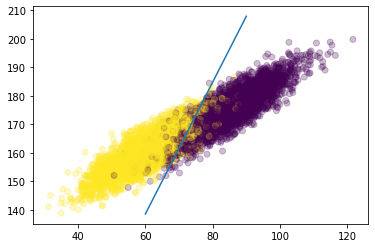

In [34]:
X_1 = np.linspace(60, 90, 100)
X_2 = (-lr.intercept_[0] - lr.coef_[0][0] * X_1)/lr.coef_[0][1]
plt.scatter(df['Peso'], df['Altura'], c=df['Genero_enc'], alpha=0.25)
plt.plot(X_1, X_2)

# Statsmodel

In [51]:
formula = 'Genero_enc ~ Peso+Altura'
lm = smf.logit(formula, df).fit()

Optimization terminated successfully.
         Current function value: 0.210415
         Iterations 8


In [52]:
lm.params

Intercept   -0.001893
Peso        -0.428712
Altura       0.185562
dtype: float64

In [53]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Genero_enc   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.6964
Time:                        15:27:37   Log-Likelihood:                -1683.3
converged:                       True   LL-Null:                       -5545.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0019      1.465     -0.001      0.999      -2.873       2.869
Peso          -0.4287      0.012    -34.484      0.000      -0.453      -0.404
Altura         0.1856      0.013     14.787      0.000       0.161       0.210
==============================================================================
"""

### Otra forma

In [57]:
lm = sm.Logit(df['Genero_enc'], df[['Peso', 'Altura']]).fit()

Optimization terminated successfully.
         Current function value: 0.210415
         Iterations 8


In [59]:
lm.params

Peso     -0.428703
Altura    0.185547
dtype: float64

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Genero_enc   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7998
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.6964
Time:                        15:29:15   Log-Likelihood:                -1683.3
converged:                       True   LL-Null:                       -5545.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Peso          -0.4287      0.010    -41.591      0.000      -0.449      -0.409
Altura         0.1855      0.004     41.462      0.000       0.177       0.194
==============================================================================
"""